In [ ]:
#pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from shapely import wkt
from shapely import wkb
from shapely.wkt import loads
import shapely.wkt
import binascii


In [3]:
# Importando los dos archivo CSV correspondientes a los dos poligonos que ubican a Nicaragua.

df0 = pd.read_csv('8f7_buildings.csv')

df1 = pd.read_csv('8f1_buildings.csv')


In [4]:
# Uniendo los dos datraframe

df = pd.concat([df0, df1]).reset_index(drop=True)
df.head()


,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
0,14.625848,-87.767214,36.9706,0.7552,"POLYGON((-87.7671734306331 14.6258433400805, -...",766JJ6GM+84MR
1,13.569355,-89.199039,25.6008,0.8205,"POLYGON((-89.1990133259928 13.5693756805286, -...",765GHR92+P9W4
2,13.688398,-89.145381,234.2944,0.7793,"POLYGON((-89.1453565 13.6883241, -89.14532 13....",765GMVQ3+9R5X
3,13.814029,-89.184477,77.5047,0.7842,"POLYGON((-89.1844260468316 13.8140554679469, -...",765GRR78+J664
4,12.166907,-86.358402,46.6608,0.7208,"POLYGON((-86.3583658751887 12.1668778726906, -...",764M5J8R+QJ96


In [5]:
# Convirtiendo la columna de geometría de strings a objeto Polygon

df['geometry'] = df['geometry'].apply(shapely.wkt.loads)

# Convirtiendo el dataframe "df" a un GeoDataFrame

gdf = gpd.GeoDataFrame(df, geometry='geometry')


In [6]:
# Obteniendo el polígono de Nicaragua

# Importando libreria que permite obtener datos geográficos de OpenStreetMap (OSM) y
# manipularlos como si fueran una red de calles

import osmnx as ox

# Usando osmnx para obtener el polígono de Nicaragua
nicaragua = ox.geocode_to_gdf('Nicaragua')

# GeoDataFrame cuenta con una sola fila, entonces seleccionamos el primer polígono
polygon = nicaragua['geometry'][0]


In [7]:
# Filtramos los datos para obtener solo la información de Nicaragua. Esto toma unas 2.5 horas

gdf_nic = gdf[gdf.geometry.within(polygon)]


In [8]:
gdf_nic

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code
4,12.166907,-86.358402,46.6608,0.7208,"POLYGON ((-86.35837 12.16688, -86.35839 12.166...",764M5J8R+QJ96
17,12.665827,-87.177592,113.0188,0.7771,"POLYGON ((-87.17751 12.66585, -87.17767 12.665...",764JMR8C+8XM2
18,11.818109,-86.512151,468.7944,0.8635,"POLYGON ((-86.51205 11.81820, -86.51223 11.818...",763MRF9Q+64X6
21,13.074826,-85.336489,59.6364,0.8614,"POLYGON ((-85.33645 13.07480, -85.33646 13.074...",765P3MF7+WCJ3
26,11.834427,-86.026355,18.1095,0.7183,"POLYGON ((-86.02633 11.83445, -86.02637 11.834...",763MRXMF+QFC4
...,...,...,...,...,...,...
12394561,12.964618,-84.017648,7.8616,0.6651,"POLYGON ((-84.01763 12.96460, -84.01763 12.964...",764QXX7J+RWXM
12394562,14.070193,-84.640562,115.8833,0.7787,"POLYGON ((-84.64051 14.07024, -84.64059 14.070...",766Q39C5+3QGJ
12394563,14.033108,-83.385712,19.0149,0.7044,"POLYGON ((-83.38570 14.03308, -83.38569 14.033...",766R2JM7+6PV6
12394565,12.497888,-83.511190,26.6629,0.7954,"POLYGON ((-83.51116 12.49788, -83.51117 12.497...",764RFFXQ+5G3H


In [11]:
# Guardando el dataframe de Nicaragua en formato CSV.

gdf_nic.to_csv('gdf_nic.csv')

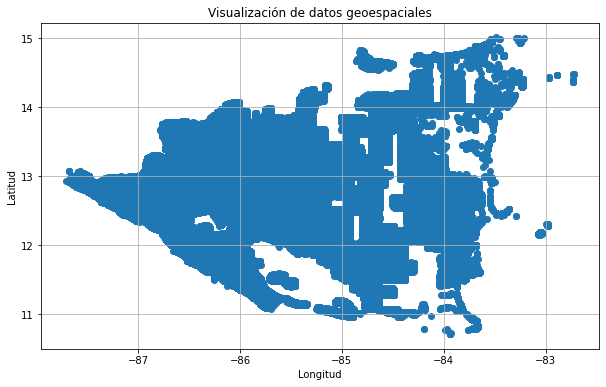

In [12]:
# Graficando para tener un visualización espacial de los datos.

plt.figure(figsize=(10, 6))
plt.scatter(gdf_nic['longitude'], gdf_nic['latitude'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Visualización de datos geoespaciales')
plt.grid(True)
plt.show()


In [ ]:
###########################################################################################################

In [13]:
# Importando la base de datos para extraer los polígonos de los municipios

muni = pd.read_csv('municipios_nic.csv')


In [14]:
# Transformación de la varibales "the_geom" (WKB (Well-Known Binary)) a formato shapely.geometry.

muni['the_geom'] = muni['the_geom'].apply(lambda x: wkb.loads(binascii.unhexlify(x)))

# Convirtiendo el dataframe muni a formato GeoDataFrame

gdf_muni = gpd.GeoDataFrame(muni, geometry='the_geom')


In [15]:
# Verificando que gdf_nic sean GeoDataFrame

if isinstance(gdf_nic, gpd.GeoDataFrame):
    print("df es un GeoDataFrame")
else:
    print("df no es un GeoDataFrame")

df es un GeoDataFrame


In [16]:
# Verificando que gdf_muni sean GeoDataFrame

if isinstance(gdf_muni, gpd.GeoDataFrame):
    print("df es un GeoDataFrame")
else:
    print("df no es un GeoDataFrame")

df es un GeoDataFrame


In [17]:
###########################################################################################################

In [18]:
# Unión de gdf_nic y gdf_muni

# Cambiando el nombre de la variable "the_geom" a "geometry" en gdf_muni.
gdf_muni = gdf_muni.rename(columns={'the_geom': 'geometry'})

# Definiendo la variables "geometry" como la columna de geometría activa
gdf_muni = gdf_muni.set_geometry('geometry')

# Uniendo las bases de datos realizando un spatial join
gdf_nic_muni = gpd.sjoin(gdf_nic, gdf_muni, how="left", op='intersects')


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
# Guardando el GeoDataFrame de edificaciones de Nicaragua a nivel de municipios en formato CSV.

gdf_nic_muni.to_csv('gdf_nic_muni.csv')


In [74]:
# NOTA IMPORTANTE: HAY 8018 REGISTROS QUE NO ENCONTRARON CORRESPONDENCIA, AL PARECER SON UBICACIONES
# EN LOS LÍMITES DE LOS POLÍGONOS

# Eliminar detecciones por debajo del 90% de confianza

In [23]:
gdf_nic_muni.head()

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,index_right,cartodb_id,region,municipio,departamen,perim_km,area_ha
4,12.166907,-86.358402,46.6608,0.7208,"POLYGON ((-86.35837 12.16688, -86.35839 12.166...",764M5J8R+QJ96,40.0,97.0,Pacifico,Mateare,MANAGUA,108.56,29591.80
17,12.665827,-87.177592,113.0188,0.7771,"POLYGON ((-87.17751 12.66585, -87.17767 12.665...",764JMR8C+8XM2,90.0,52.0,Pacifico,El Viejo,CHINANDEGA,505.84,126600.11
18,11.818109,-86.512151,468.7944,0.8635,"POLYGON ((-86.51205 11.81820, -86.51223 11.818...",763MRF9Q+64X6,50.0,117.0,Pacifico,San Rafael del Sur,MANAGUA,97.06,36168.68
21,13.074826,-85.336489,59.6364,0.8614,"POLYGON ((-85.33645 13.07480, -85.33646 13.074...",765P3MF7+WCJ3,150.0,151.0,Central,Rio Blanco,MATAGALPA,189.20,67140.43
26,11.834427,-86.026355,18.1095,0.7183,"POLYGON ((-86.02633 11.83445, -86.02637 11.834...",763MRXMF+QFC4,109.0,123.0,Pacifico,Diriomo,GRANADA,36.17,5304.12


In [25]:
gdf_nic_muni[gdf_nic_muni['index_right'].isna()]

,latitude,longitude,area_in_meters,confidence,geometry,full_plus_code,index_right,cartodb_id,region,municipio,departamen,perim_km,area_ha
3712,11.912582,-85.904628,125.8764,0.8887,"POLYGON ((-85.90455 11.91255, -85.90456 11.912...",763PW37W+24Q9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4444,12.165473,-86.293765,57.6352,0.7853,"POLYGON ((-86.29375 12.16542, -86.29374 12.165...",764M5P84+5FQW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4738,11.305137,-85.933414,19.7472,0.6567,"POLYGON ((-85.93338 11.30515, -85.93344 11.305...",763P8348+3J4H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9732,11.451500,-85.789894,24.9575,0.7930,"POLYGON ((-85.78987 11.45148, -85.78988 11.451...",763PF626+H2XV,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12607,11.900290,-85.924979,19.4145,0.6952,"POLYGON ((-85.92496 11.90027, -85.92496 11.900...",763PW32G+426G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12393900,12.035799,-83.764066,74.8297,0.9059,"POLYGON ((-83.76401 12.03578, -83.76403 12.035...",764R26PP+897X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12393924,14.717689,-84.151091,18.6814,0.7848,"POLYGON ((-84.15107 14.71767, -84.15107 14.717...",766QPR9X+3HFC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12394297,11.128709,-83.833236,36.1417,0.8138,"POLYGON ((-83.83321 11.12868, -83.83322 11.128...",763R45H8+FPJ7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12394502,11.993829,-83.694430,635.2945,0.7843,"POLYGON ((-83.69426 11.99390, -83.69459 11.993...",763RX8V4+G6P3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
gdf_nic_muni[gdf_nic_muni['municipio'] == 'Chichigalpa']['municipio'].value_counts()

Chichigalpa    19627
Name: municipio, dtype: int64